In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pointbiserialr, spearmanr
from utils import *
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import joblib
from sklearn.metrics import f1_score


In [48]:
df = pd.read_csv("adult.csv")

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Spliting Data To Train and Test

In [50]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [51]:
test.to_csv("test.csv",index=False)

## Dropping Duplicates

#### Is there a dublicated entries?

In [52]:
train.duplicated().sum()

np.int64(32)

#### Dropping dublicated entries

In [53]:
train = train.drop_duplicates()

## Handling Missing Values

In [54]:
train.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Checking Categorical Attributes
We have 8 categorical attributes:
- workclass
- education
- marital-status
- occupation
- relationship
- race
- sex
- native-country

In [55]:
categorical_variables = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "gender",
    "native-country",
]
for var in categorical_variables:
    print(value_counts_with_percentage(df, column_name=var))
    print(50*"#")

                  Count  Percentage
workclass                          
Private           33906   69.419762
Self-emp-not-inc   3862    7.907129
Local-gov          3136    6.420703
?                  2799    5.730724
State-gov          1981    4.055935
Self-emp-inc       1695    3.470374
Federal-gov        1432    2.931903
Without-pay          21    0.042996
Never-worked         10    0.020474
##################################################
              Count  Percentage
education                      
HS-grad       15784   32.316449
Some-college  10878   22.271815
Bachelors      8025   16.430531
Masters        2657    5.439990
Assoc-voc      2061    4.219729
11th           1812    3.709922
Assoc-acdm     1601    3.277917
10th           1389    2.843864
7th-8th         955    1.955284
Prof-school     834    1.707547
9th             756    1.547848
12th            657    1.345154
Doctorate       594    1.216166
5th-6th         509    1.042136
1st-4th         247    0.505712
Preschool

After reviewing the unique values, I discovered that the character `?` appears in several entries, particularly in the `workclass`, `occupation`, and `native-country` columns. This indicates that these entries represent missing values.

In [56]:
fill_missing_entries_with_nan(train,"native-country","?")
fill_missing_entries_with_nan(train,"occupation","?")
fill_missing_entries_with_nan(train,"workclass","?")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
37193,42,Private,145175,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
31093,52,Self-emp-not-inc,175029,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,United-States,<=50K
33814,34,Local-gov,172664,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
14500,28,Private,125791,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
23399,46,Private,28419,Assoc-voc,11,Never-married,Transport-moving,Not-in-family,White,Male,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,36,Private,635913,HS-grad,9,Married-spouse-absent,Other-service,Not-in-family,Black,Male,0,0,40,United-States,<=50K
44732,34,Private,107624,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
38158,28,Private,250135,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
860,46,State-gov,96652,Assoc-voc,11,Separated,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K


In [57]:
categorical_variables = [
    "workclass",
    "occupation",
    "native-country",
]
for var in categorical_variables:
    print(value_counts_with_percentage(train, column_name=var))
    print(50*"#")

                  Count  Percentage
workclass                          
Private           27094   69.398837
Self-emp-not-inc   3060    7.837914
Local-gov          2499    6.400963
State-gov          1578    4.041905
Self-emp-inc       1376    3.524500
Federal-gov        1145    2.932814
Without-pay          18    0.046105
Never-worked          9    0.023053
##################################################
                   Count  Percentage
occupation                          
Prof-specialty      4910   12.576522
Craft-repair        4898   12.545785
Exec-managerial     4869   12.471504
Adm-clerical        4485   11.487923
Sales               4416   11.311186
Other-service       3954   10.127814
Machine-op-inspct   2425    6.211419
Transport-moving    1868    4.784714
Handlers-cleaners   1661    4.254502
Farming-fishing     1159    2.968674
Tech-support        1113    2.850849
Protective-serv      800    2.049128
Priv-house-serv      199    0.509721
Armed-Forces          13    0.0332

Now we can say there are no more missing values in the dataset.

## Detect Outliers

In [58]:
detect_outliers_zscore(train,'age')

147


In [59]:
detect_outliers_zscore(train,'hours-per-week')

547


## Encoding cetegorical columns

In [60]:
label_encoder = LabelEncoder()
train_encoded = train.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)

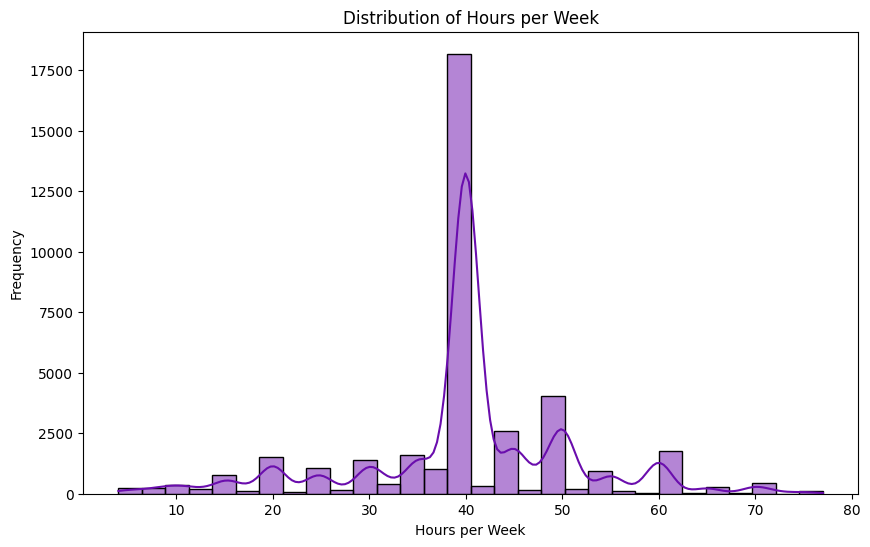

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(train_encoded['hours-per-week'], kde=True, bins=30, color='#6A0DAD')
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()

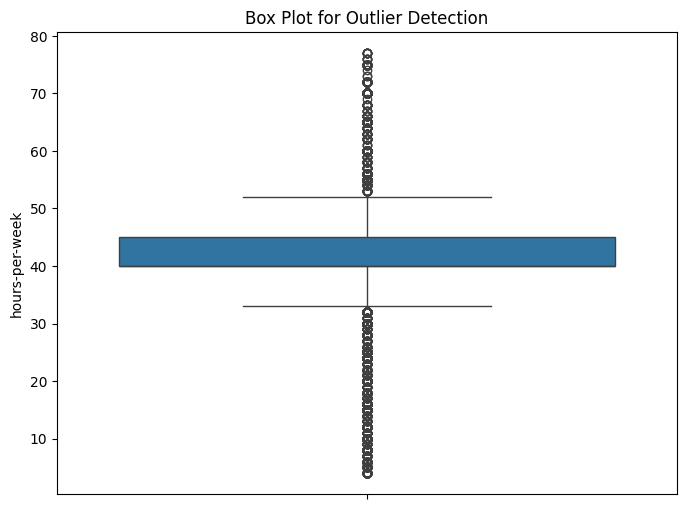

In [62]:
plt.figure(figsize=(8,6))
sns.boxplot(data=train_encoded, y='hours-per-week')
plt.title('Box Plot for Outlier Detection')
plt.show()

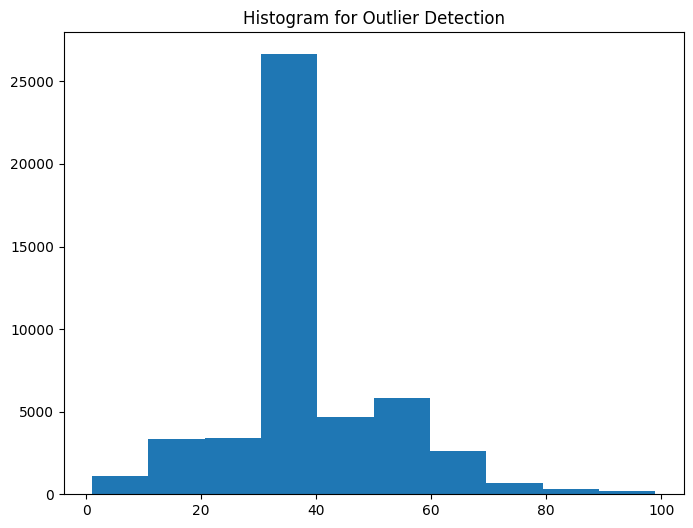

In [63]:
plt.figure(figsize=(8,6))
plt.hist(df['hours-per-week'], bins=10)
plt.title('Histogram for Outlier Detection')
plt.show()

In [64]:
len(train_encoded)

38347

## Feature Scaling

In [65]:
scaler = MinMaxScaler()

# Apply Min-Max scaling
train_scaled = pd.DataFrame(scaler.fit_transform(train_encoded), columns=train_encoded.columns)


In [66]:
train_scaled

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.403226,0.375,0.090253,1.000000,0.600000,0.333333,0.428571,0.0,1.0,1.0,0.0,0.0,0.493151,0.926829,0.0
1,0.564516,0.625,0.110528,0.000000,0.333333,0.333333,0.142857,0.0,1.0,1.0,0.0,0.0,0.424658,0.926829,0.0
2,0.274194,0.125,0.108922,0.733333,0.533333,0.333333,0.142857,0.0,1.0,1.0,0.0,0.0,0.493151,0.926829,0.0
3,0.177419,0.375,0.077088,0.733333,0.533333,0.666667,0.000000,0.2,1.0,0.0,0.0,0.0,0.493151,0.926829,0.0
4,0.467742,0.375,0.010957,0.533333,0.666667,0.666667,0.928571,0.2,1.0,1.0,0.0,0.0,0.630137,0.926829,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38342,0.306452,0.375,0.423539,0.733333,0.533333,0.500000,0.500000,0.2,0.5,1.0,0.0,0.0,0.493151,0.926829,0.0
38343,0.274194,0.375,0.064750,1.000000,0.600000,0.333333,0.142857,0.0,1.0,1.0,0.0,0.0,0.630137,0.926829,0.0
38344,0.177419,0.375,0.161537,1.000000,0.600000,0.000000,0.214286,0.2,1.0,0.0,0.0,0.0,0.493151,0.926829,0.0
38345,0.467742,0.750,0.057298,0.533333,0.666667,0.833333,0.000000,0.8,0.5,0.0,0.0,0.0,0.493151,0.926829,0.0


In [67]:
X = train_scaled.drop('income', axis=1)
y = train_scaled['income']
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

In [68]:
xgb_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [69]:
y_train_pred = xgb_model.predict(X)

In [70]:
f1 = f1_score(y, y_train_pred)

In [71]:
f1

np.float64(0.7230120481927711)

## Fitting another model without making featurs scaling

In [72]:
X2 = train_encoded.drop('income', axis=1)
y2 = train_encoded['income']
xgb_model2 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model2.fit(X2,y2)
y2_train_pred = xgb_model.predict(X2)
f1_model2 = f1_score(y2, y2_train_pred)
f1_model2

np.float64(0.4755461840332689)

## Saving model and some data we need in test

In [73]:
mean_train = train_encoded.mean()
std_train = train_encoded.std()

In [74]:
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(mean_train.age, 'mean_age_train.pkl')
joblib.dump(mean_train["hours-per-week"], 'mean_hours_train.pkl')
joblib.dump(std_train.age, 'std_age_train.pkl')
joblib.dump(std_train["hours-per-week"], 'std_hours_train.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']